<a href="https://colab.research.google.com/github/abdullahkhafabi-010/MACHINE-LEARNING/blob/main/WEEK7/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Abdullah Khafabi

Nim: 2041720050

Kelas: 3A

# Praktikum 1

In [2]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/week7/iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

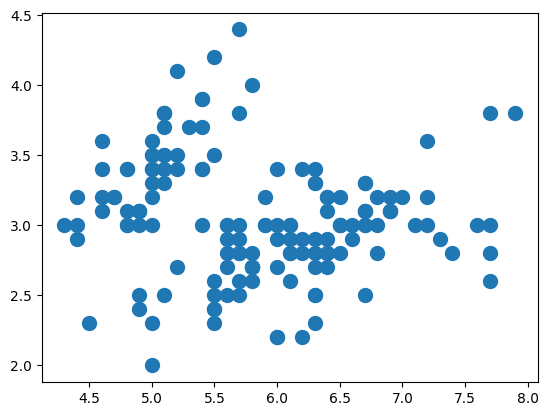

In [4]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [5]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


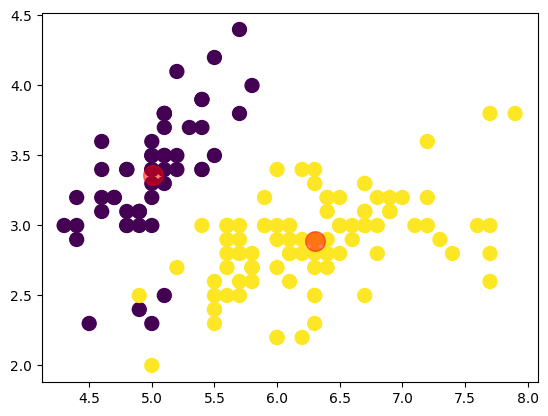

In [6]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [7]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

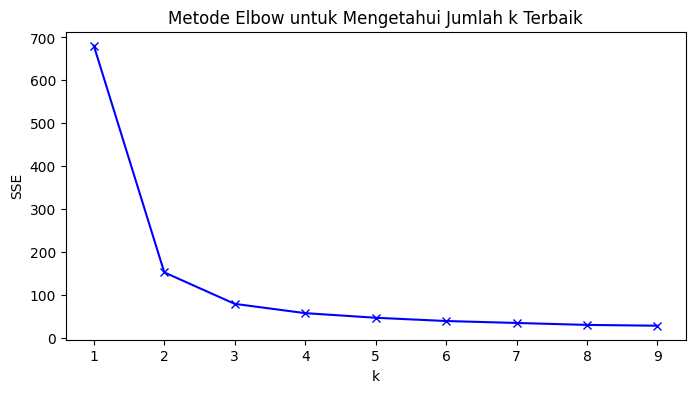

In [8]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [9]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244000000001
k=2; SSE=152.36870647733906
k=3; SSE=78.940841426146
k=4; SSE=57.317873214285704
k=5; SSE=46.53558205128205
k=6; SSE=38.964787851037855
k=7; SSE=34.421947665056365
k=8; SSE=29.889178904428903
k=9; SSE=27.99411819552997


# Praktikum 2

import library

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Pengantar k-Means

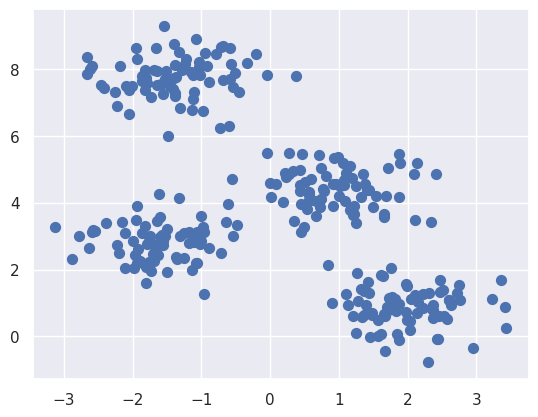

In [11]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


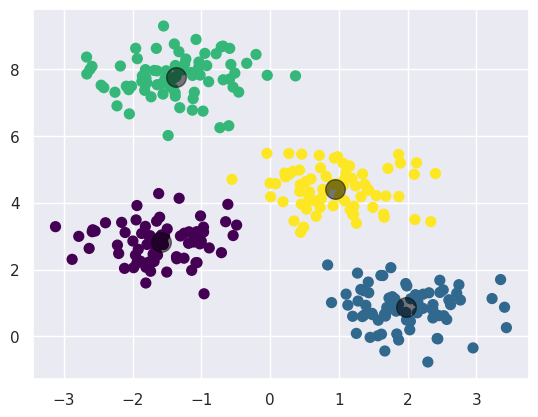

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Algoritma Expectation-Maximization

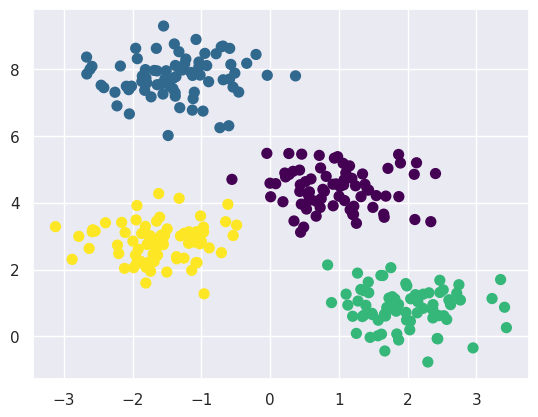

In [14]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Perubahan random

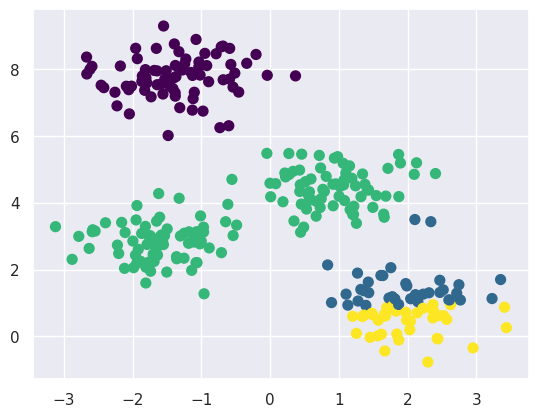

In [15]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Optimalisasi Jumlah Klaster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


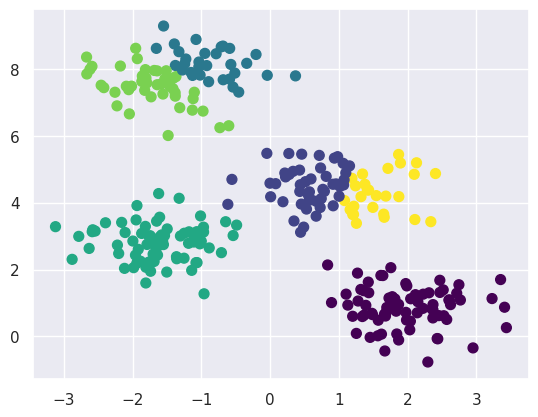

In [16]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Batas Klaster yang Tidak Selalu Linier

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


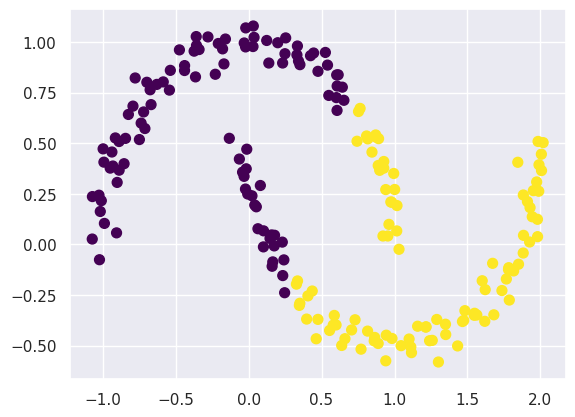

In [18]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


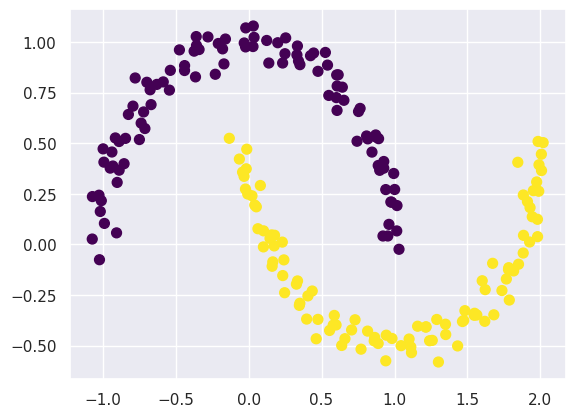

In [19]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Contoh Kasus 1: Karakter Angka

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [21]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

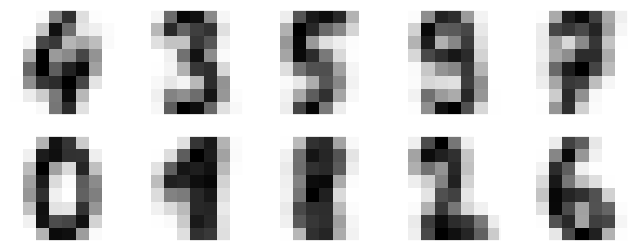

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [23]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

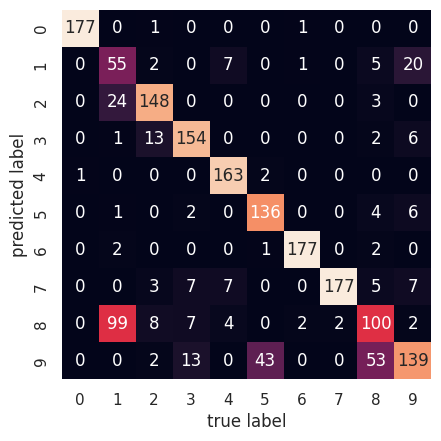

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9415692821368948

Studi Kasus 2: Kompresi Citra

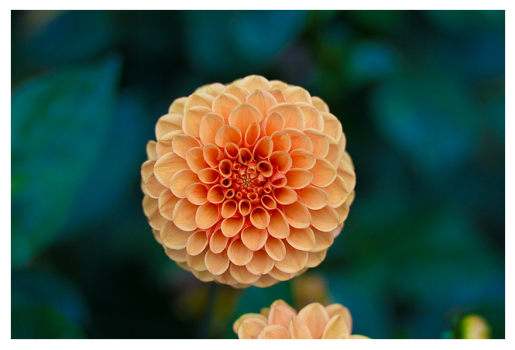

In [27]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [28]:
flower.shape

(427, 640, 3)

In [29]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [30]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

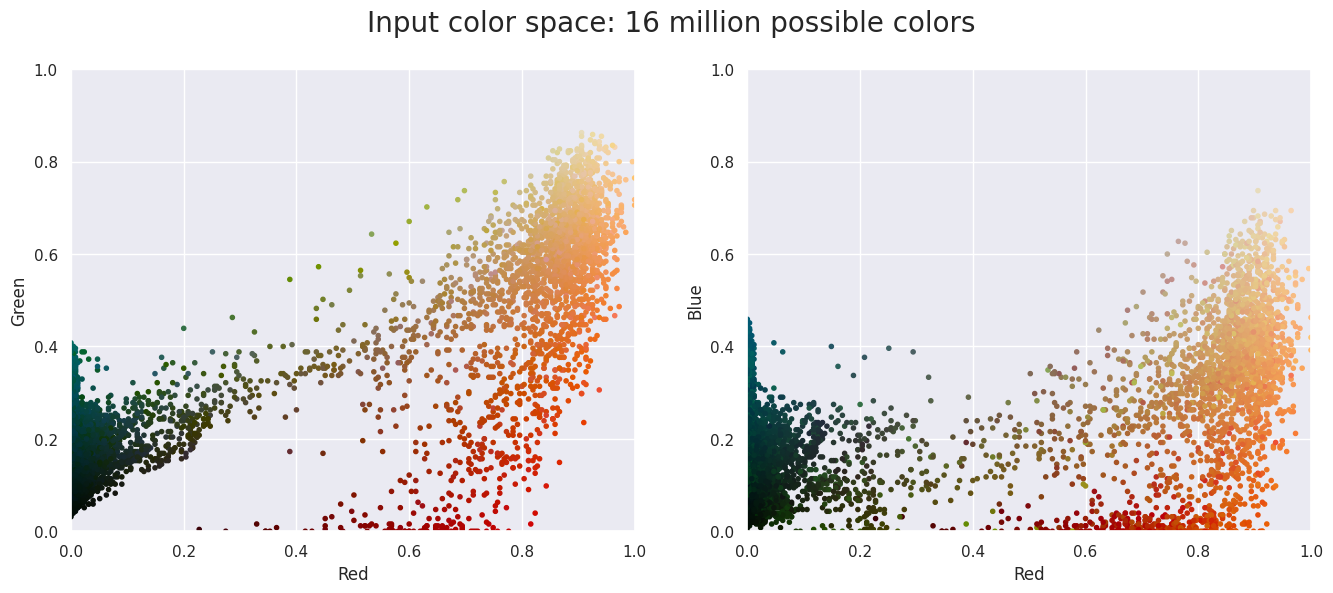

In [31]:
plot_pixels(data, title='Input color space: 16 million possible colors')

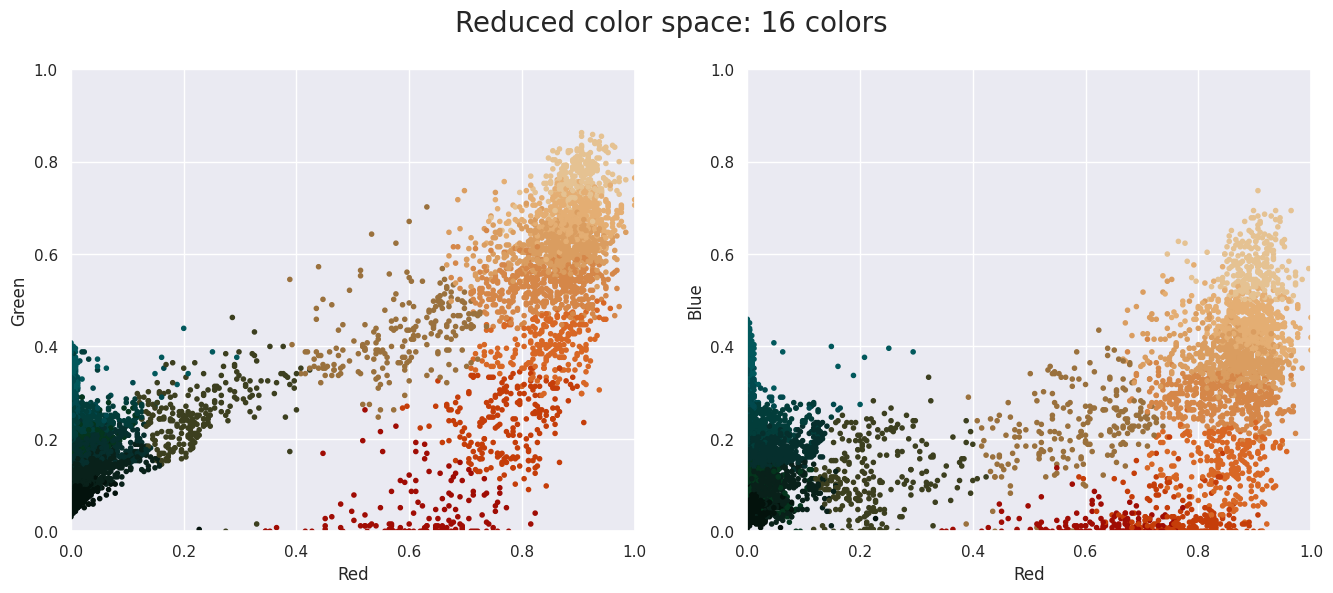

In [32]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

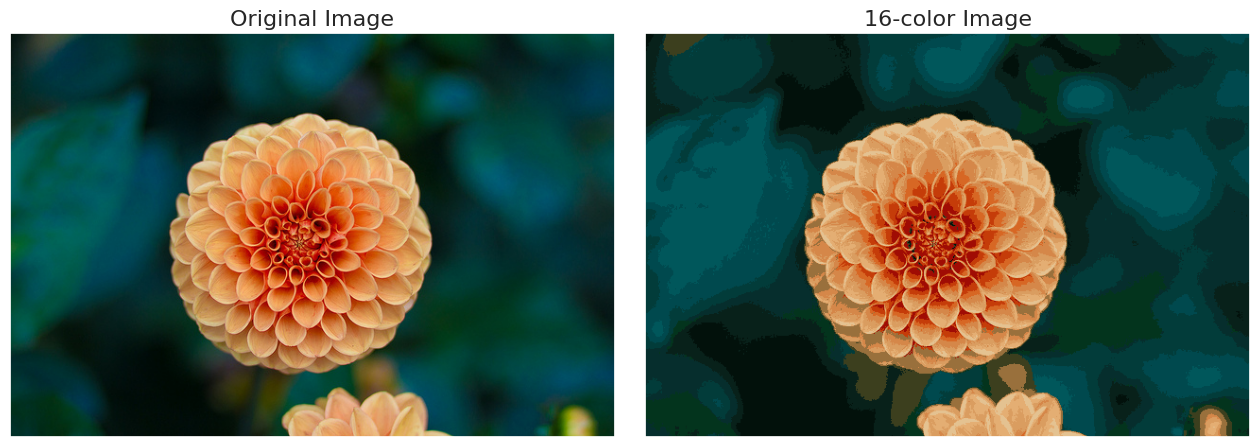

In [33]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Praktikum 3

instalasi SOM

In [34]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=bdfed99d07b2aa9f393d183437412238ba622bcac497ca1d701418b70d4b4564
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [35]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Gunakan dataset Iris sebagai contoh

In [36]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Normalisasi dataset agar nilainya berada dalam rentang yang seragam

In [37]:
# Normalisasi data
data = data / data.max(axis=0)

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

In [38]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Inisialisasi bobot SOM secara acak.

In [39]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Melatih SOM dengan data menggunakan metode train_random.

In [40]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

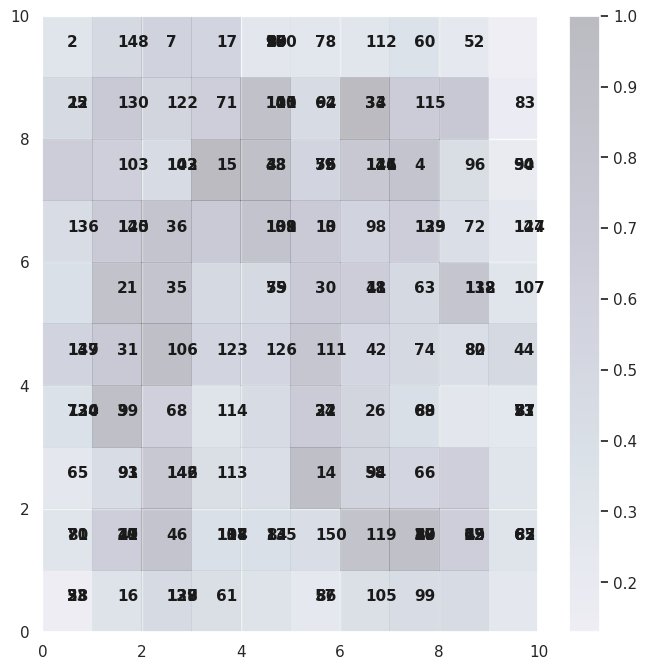

In [41]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

# Praktikum 4

instalasi minisom

In [56]:
pip install minisom

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [58]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [59]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [60]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [61]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [62]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

        print(f"Epoch {epoch + 1}/{num_epochs}, Tingkat Pembelajaran: {learning_rate:.4f}, Radius Tetangga: {neighborhood_radius:.4f}")

    return weights

In [63]:
from skimage import io
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "/content/drive/MyDrive/Machine Learning/week7/Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [64]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

Epoch 1/100, Tingkat Pembelajaran: 0.1000, Radius Tetangga: 5.0000
Epoch 2/100, Tingkat Pembelajaran: 0.0990, Radius Tetangga: 4.9502
Epoch 3/100, Tingkat Pembelajaran: 0.0980, Radius Tetangga: 4.9010
Epoch 4/100, Tingkat Pembelajaran: 0.0970, Radius Tetangga: 4.8522
Epoch 5/100, Tingkat Pembelajaran: 0.0961, Radius Tetangga: 4.8039
Epoch 6/100, Tingkat Pembelajaran: 0.0951, Radius Tetangga: 4.7561
Epoch 7/100, Tingkat Pembelajaran: 0.0942, Radius Tetangga: 4.7088
Epoch 8/100, Tingkat Pembelajaran: 0.0932, Radius Tetangga: 4.6620
Epoch 9/100, Tingkat Pembelajaran: 0.0923, Radius Tetangga: 4.6156
Epoch 10/100, Tingkat Pembelajaran: 0.0914, Radius Tetangga: 4.5697
Epoch 11/100, Tingkat Pembelajaran: 0.0905, Radius Tetangga: 4.5242
Epoch 12/100, Tingkat Pembelajaran: 0.0896, Radius Tetangga: 4.4792
Epoch 13/100, Tingkat Pembelajaran: 0.0887, Radius Tetangga: 4.4346
Epoch 14/100, Tingkat Pembelajaran: 0.0878, Radius Tetangga: 4.3905
Epoch 15/100, Tingkat Pembelajaran: 0.0869, Radius Tetang

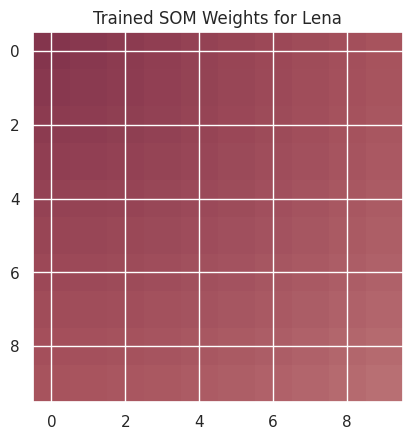

In [65]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

# Tugas

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah implementasi model SOM untuk segmentasi citra lain

1. Gunakan data 'Mall_Customers.csv'

Import Library dan Persiapan Data

In [67]:
# Persiapan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/week7/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
# Check for missing values
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [66]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


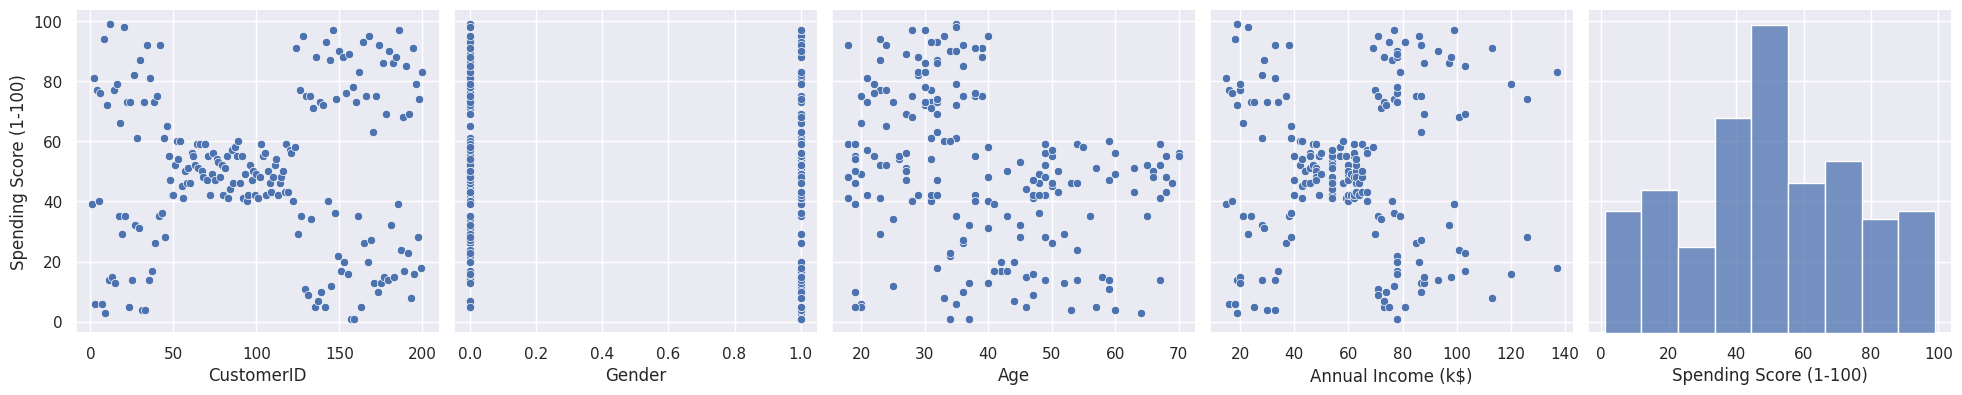

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

sns.pairplot(df, x_vars=df.columns,
             y_vars=df.columns[-1], height=4, aspect=1, kind='scatter')
plt.show()

Terlihat pada diatas pada korelasi Spending score dan annual income mendapati pola clustering. Sehingga kita akan memakai 2 fitur yaitu Annual Income dan Spending Score.

3. Buatlah model K-Means dengan mempertimbangkan jumlah yang terbaik
  *   Feature: [Annual Income, Spending Score]



In [70]:
# Memisahkan data fitur
df_train = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(df_train)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


Text(0, 0.5, 'Spending Score')

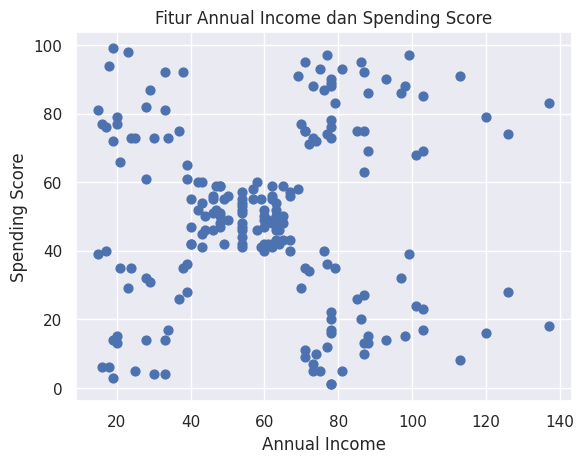

In [71]:
# Visualisasi data fitur
plt.title("Fitur Annual Income dan Spending Score")
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s=40)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

Train Model

In [72]:
# Train k-means model
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=2, n_init=10)

y_kmeans = cl_kmeans.fit_predict(df_train)
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 181363.59595959593


Optimalisasi K menggunakan Elbow

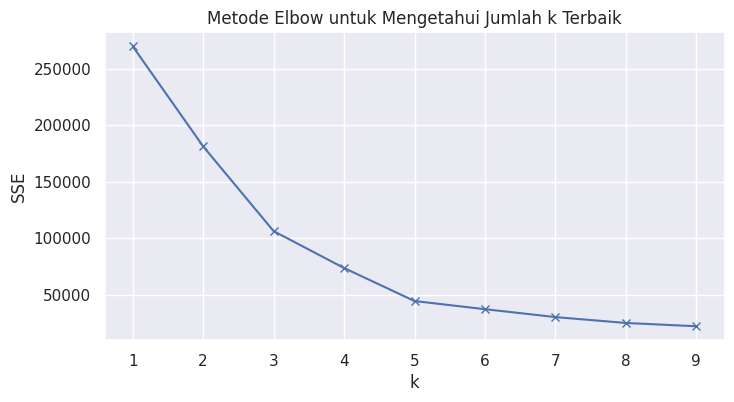

In [73]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1, 10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k, n_init=10)
 kmeanModel.fit(df_train)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Dengan menggunakaan metode elbow mendapatkan k=5 untuk k yang paling optimal

In [74]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1): print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181363.59595959593
k=3; SSE=106348.37306211122
k=4; SSE=73679.78903948836
k=5; SSE=44448.4554479337
k=6; SSE=37233.814510710006
k=7; SSE=30241.34361793658
k=8; SSE=25044.967764018933
k=9; SSE=22131.92051101073


Optimalisasi K menggunakan Silhoutte

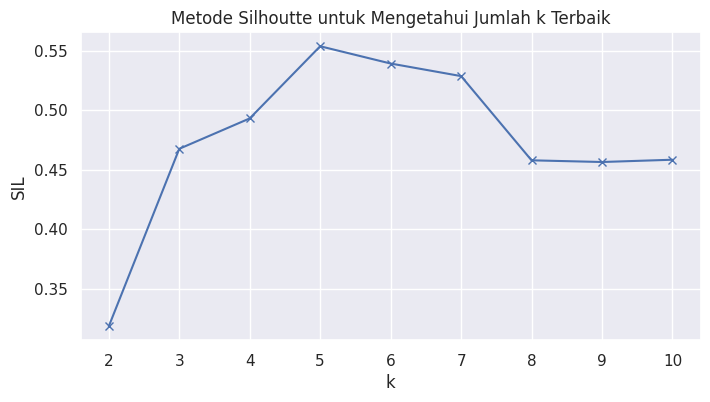

In [75]:
from sklearn.metrics import silhouette_score

# Optimalisasi K dengan silhouette

sil = []
kmax = 10
K = range(2, kmax+1)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init=10).fit(df_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_train, labels, metric='euclidean'))

plt.figure(figsize=(8, 4))
plt.plot(K, sil, "bx-")
plt.xlabel("k")
plt.ylabel("SIL")
plt.title("Metode Silhoutte untuk Mengetahui Jumlah k Terbaik")
plt.show()

Retrain Model dengan optimal k

In [76]:
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=5, n_init=10)

y_kmeans = cl_kmeans.fit_predict(df_train)

Visualisasi Klustering

Text(0, 0.5, 'Spending Score')

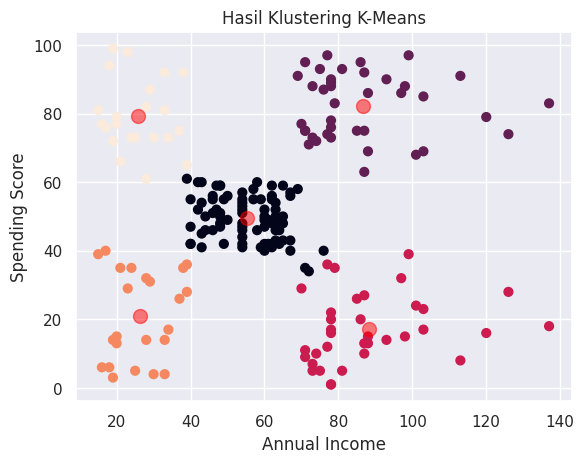

In [77]:
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s=40, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

4. Buatlah implementasi model SOM untuk segmentasi citra lain

In [78]:
pip install minisom

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from PIL import Image

In [80]:
# Konversi citra menjadi dataset
def create_dataset(image):
    width, height = image.size
    pixels = np.array(image.getdata())
    return pixels / 255.0

# Konversi hasil SOM menjadi citra yang sudah disegmentasi
def create_segmented_image(image_data, som, width, height):
    segmented_image = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            pixel = image_data[i * width + j]
            winner = som.winner(pixel)
            segmented_image[i, j] = som.get_weights()[winner[0], winner[1]] * 255

    return segmented_image

In [81]:
image_path = "/content/drive/MyDrive/Machine Learning/week7/kitten01.jpeg"
original_image = Image.open(image_path)

In [82]:
# Konversi citra menjadi dataset
image_data = create_dataset(original_image)

som_grid_size = (20, 20)

som = MiniSom(som_grid_size[0], som_grid_size[1], image_data.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(image_data, 1000)

segmented_image = create_segmented_image(image_data, som, original_image.width, original_image.height)

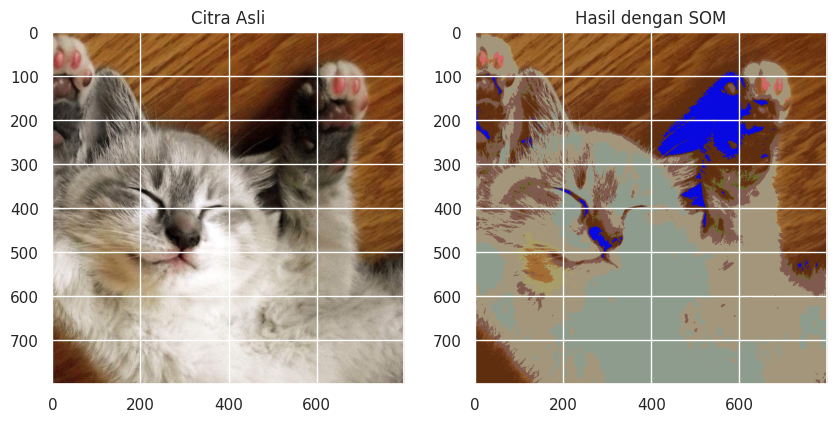

In [83]:
# Tampilkan citra asli dan hasil segmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Citra Asli")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Hasil dengan SOM")

plt.show()